# Linear Regression

In [1]:
import numpy as np

class LinearRegressor: 
    def __init__(self, lr=0.01, max_iters=1000, epochs=1, batch_size=5):
        self.lr = lr
        self.max_iters = max_iters
        self.epochs = epochs
        self.batch_size = batch_size
        self.theta = None
    
    def __call__(self, X):
        return self.predict(X)
    
    def predict(self, X):
        preds = []
        for instance in X:
            preds.append(self.theta.dot(np.append(instance, 1)))
        return np.array(preds)
    
    def fit(self, X, y):
        num_obvs, self.num_features = X.shape
        self.theta = np.random.random((self.num_features+1,))
        
        iters = 0
        for _ in range(self.epochs):
            for _ in range(num_obvs // self.batch_size):
                rand_inds = np.random.choice(np.arange(num_obvs), self.batch_size)
                X_minibatch, y_minibatch = X[rand_inds], y[rand_inds]
                if iters >= self.max_iters:
                    break
                iters += 1
                
                preds = self(X_minibatch)
                dtheta = self.get_theta_update(X_minibatch, y_minibatch, preds)
                self.theta -= self.lr * dtheta
                
    def get_theta_update(self, X, labels, preds):
        theta_updates = []
        for ind in range(X.shape[0]):
            pred = preds[ind]
            label = labels[ind]
            features = X[ind]
            theta_update = np.full((self.num_features+1,), (pred - label))
            theta_update *= np.append(features, 1)
            theta_updates.append(theta_update)
        theta_updates = np.array(theta_updates)
        return np.mean(theta_updates, axis=0)

## Linear Regression

In [3]:
from helpers.GetDatasets import regression_split
X_train, X_test, y_train, y_test = regression_split()

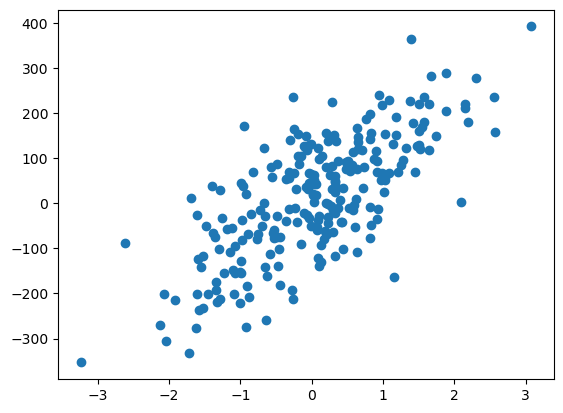

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], y_train)

In [5]:
model = LinearRegressor(max_iters=2000, batch_size=5, epochs=10)
model.fit(X_train, y_train)
preds = model(X_test)

In [7]:
from helpers.MathFunctions import r_squared
r_squared(preds, y_test)

0.9758515124196108